# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import GridSearchCV


In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Revisaremos tipos de datos, filas y columnas. Fase exploratoria.
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [4]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
#Revisión si hay valores únicos. Revisar si existen variables con un único valor a lo largo de la data.
v_uniques = df.nunique()
v_uniques

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [6]:
#Valores faltantes en el dataSet
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#Revisión de filas duplicadas:
df.duplicated().sum()

np.int64(0)

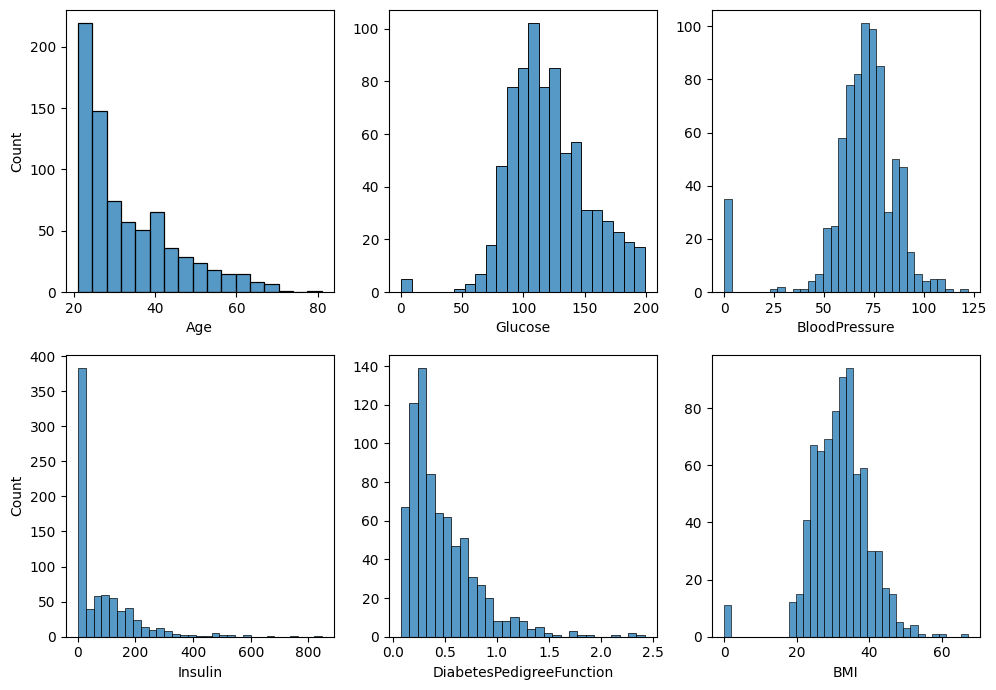

In [8]:
#Visualización de variables numéricas:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = df, x = "Age")
sns.histplot(ax = axis[0, 1], data = df, x = "Glucose").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = df, x = "BloodPressure").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = df, x = "Insulin")
sns.histplot(ax = axis[1, 1], data = df, x = "DiabetesPedigreeFunction").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = df, x = "BMI").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

## **Observaciones**
 - Los valores de glucosa en plasma (después de la prueba de tolerancia) se encuentra en su mayoría en valores normales (inferiores a 140mg/dL). Sólo algunos, con poca frecuencia, se encuentran por encima de ese valor. 
 - En cuanto a los valores de insulina sérica. La mayoría de las personas tienen valores medias correctos (5-25u/mL) pero si existe un buen número de personas que pueden presentar insulino-resistencia (valores mayores a 30U/mL)
 - Referente al 'DiabetesPedigree', con valores inferiores a 1 podrían indicar un bajo riesgo genético de padecer diabetes.
 - En cuanto a la edad, la mayoría de pacientes son menores a 40 años. Hay un gran número comprendido entre los 20-25 años. 

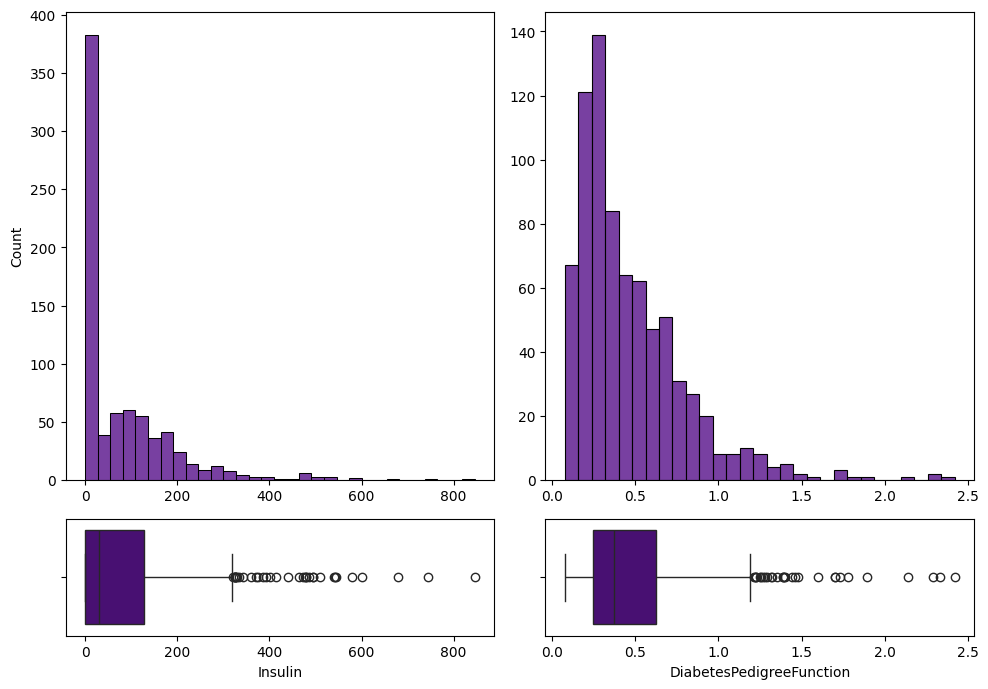

In [9]:
# Revisión de distribución de las variables: 

fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [2, 0.5]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "Insulin", color = 'indigo').set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "Insulin", color = 'indigo')
sns.histplot(ax = axis[0, 1], data = df, x = "DiabetesPedigreeFunction", color = 'indigo').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "DiabetesPedigreeFunction", color = 'indigo')

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Revisión de columnas con valores = 0 que no tienen sentido

In [11]:
count_zeros = (df['Glucose'] == 0).sum()
print(count_zeros)

5


## Transformaremos los valores = 0 a NaN para imputar o eliminar

In [12]:
# Para las columnas de insulina, glucosa y presión arterial, convertimos datos:
cols = ['Glucose', 'BloodPressure', 'Insulin']
df[cols] = df[cols].replace(0, np.nan)

In [13]:
#Valores faltantes en el dataSet
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
df.isnull().mean()*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness                0.000000
Insulin                     48.697917
BMI                          0.000000
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [15]:
#Verificación cualitativa si siguen patrones los faltantes de insulina 0. 
filas_insulina_0 = df[df['Insulin'].isna()]
filas_insulina_0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29,NaN,26.6,0.351,31,0
2,8,183.0,64.0,0,NaN,23.3,0.672,32,1
5,5,116.0,74.0,0,NaN,25.6,0.201,30,0
7,10,115.0,NaN,0,NaN,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31,NaN,44.0,0.403,43,1
762,9,89.0,62.0,0,NaN,22.5,0.142,33,0
764,2,122.0,70.0,27,NaN,36.8,0.340,27,0
766,1,126.0,60.0,0,NaN,30.1,0.349,47,1


<Axes: >

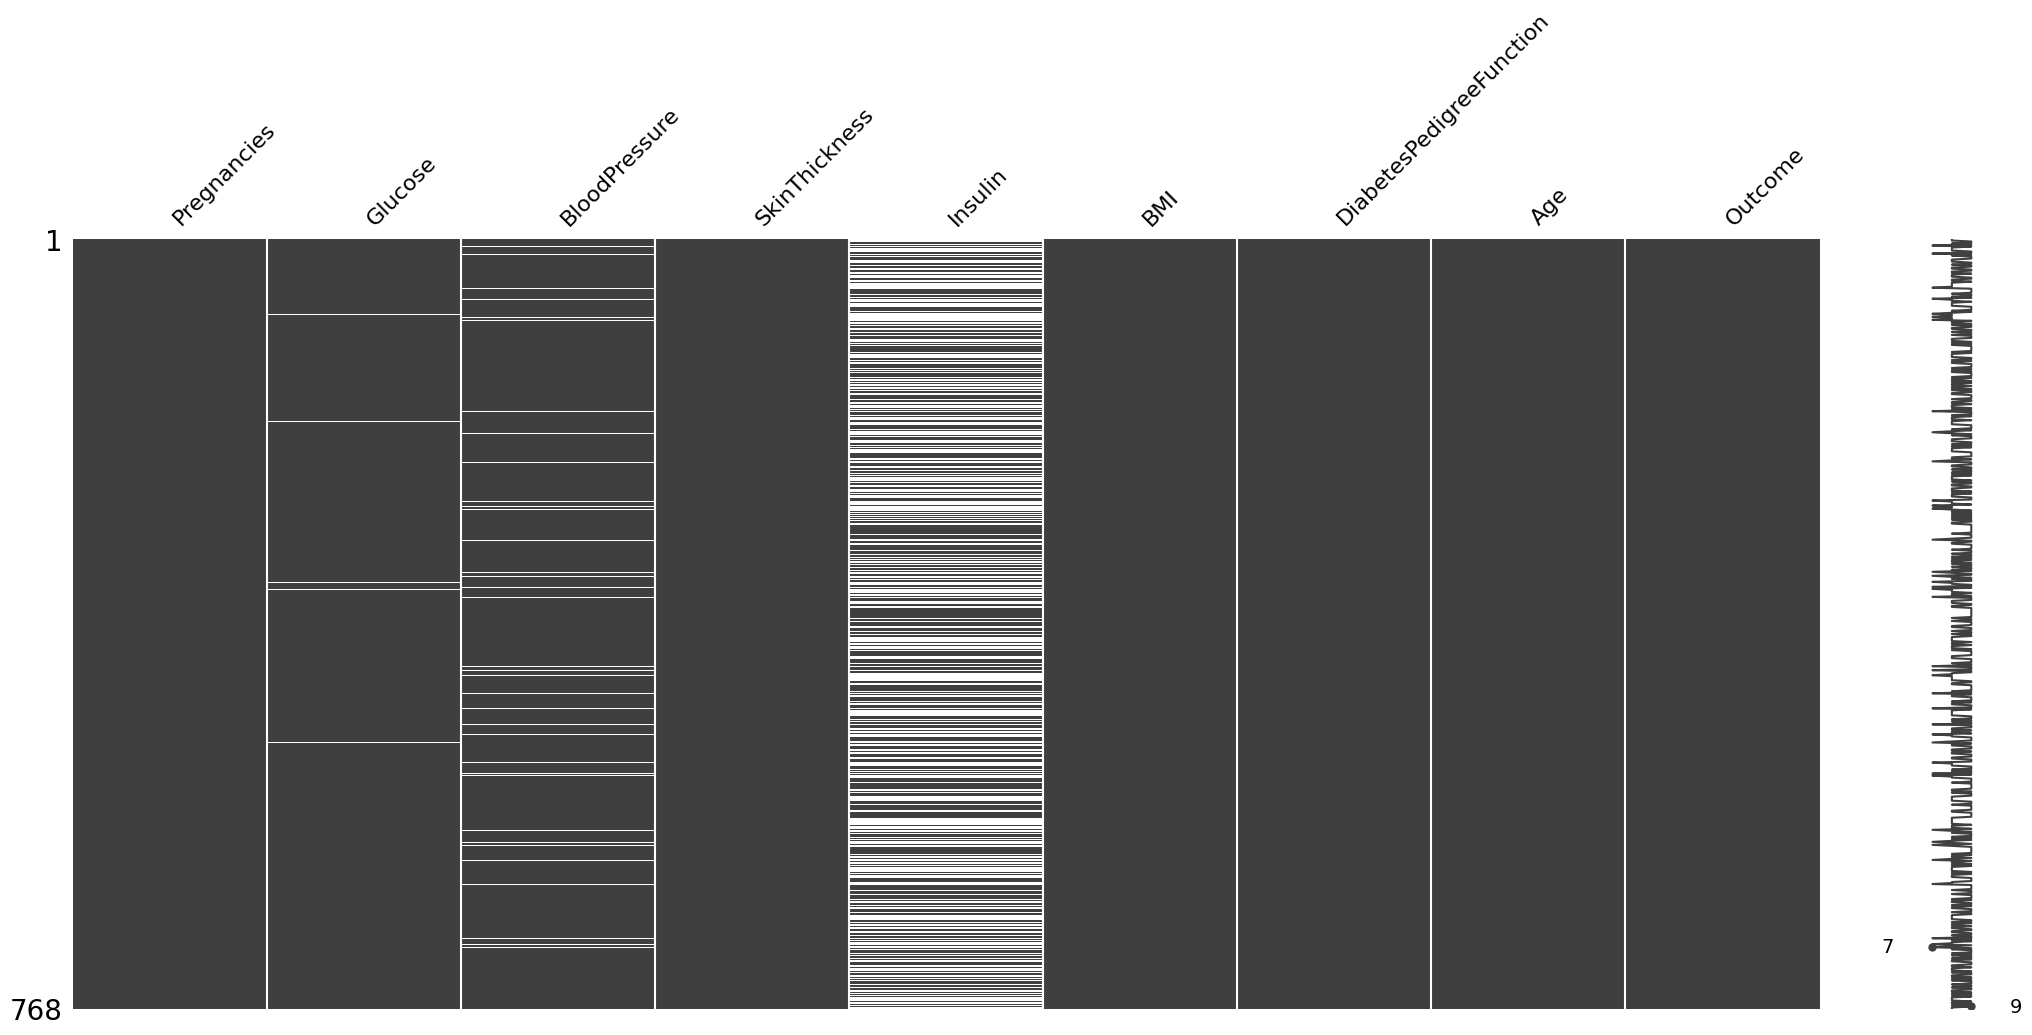

In [16]:
# Patrón de valores faltantes para eliminación o imputación de datos
msno.matrix(df)

## **Observaciones**
El patrón de faltantes no se repite entre datos y podríamos suponer que no existen factores que puedan condicionar mas de una variable. Por ende, para Glucosa y Presión Arterial se imputarán sus valores, pero para Insulina no. Me resulta muy dificil tener que eliminar la variable insulina porque me parece un valor muy especial para la determinación de prevalencia de diabetes. Imputar, anexaría demasiados valores artificiales al dataSet y perdería naturalidad/realidad en el modelo predictivo.

### Imputación de los valores

In [17]:
# Imputaremos glucosa con la media
media_glucosa = df['Glucose'].mean()
df['Glucose_imp'] = df['Glucose'].fillna(media_glucosa)

# Imputaremos presión arterial con la media
media_presion = df['BloodPressure'].mean()
df['BloodPressure_imp'] = df['BloodPressure'].fillna(media_presion)

In [18]:
df_cleaned = df.drop(columns = ['BloodPressure','Glucose', 'Insulin'])
df_cleaned
df_cleaned.to_csv('df_cleaned_diabetes.csv')

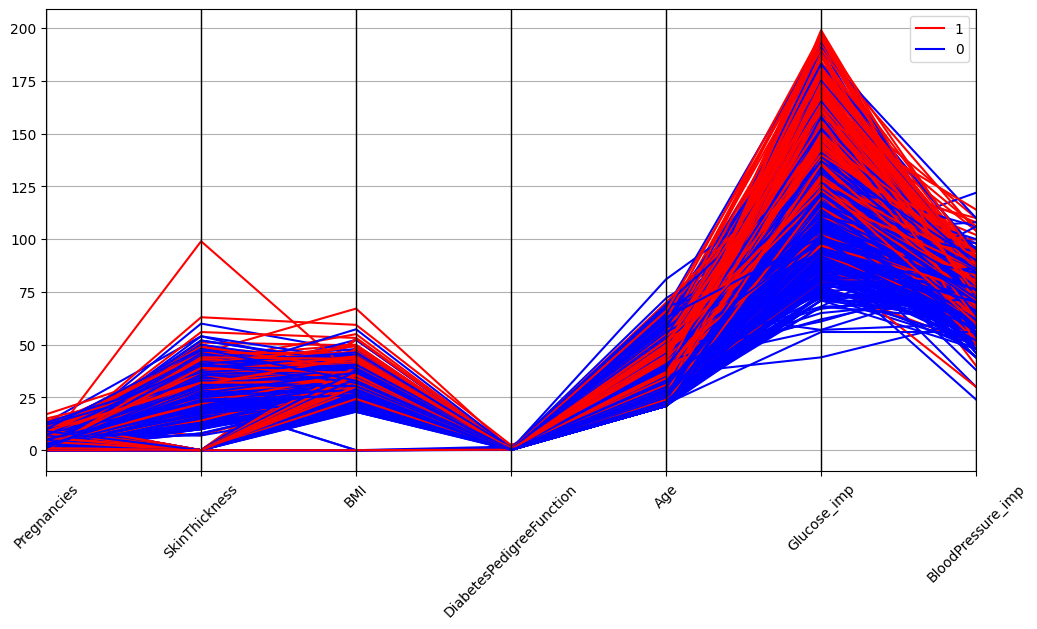

In [19]:
# Visualizamos la relación entre las características de nuestro dataset
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df_cleaned, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

## **Observaciones**
Aparentemente, la variable que a priori mejor discrimina la condición es 'glucosa'. Cuestión que tiene sentido si hablamos de diabetes, pero si logramos escalar las variables, dada la diversidad de escalas de medición de cada una, podríamos ver algún patrón distinto. 

Tampoco se ve con claridad la diferencia entre ambas condiciones con estos colores. 

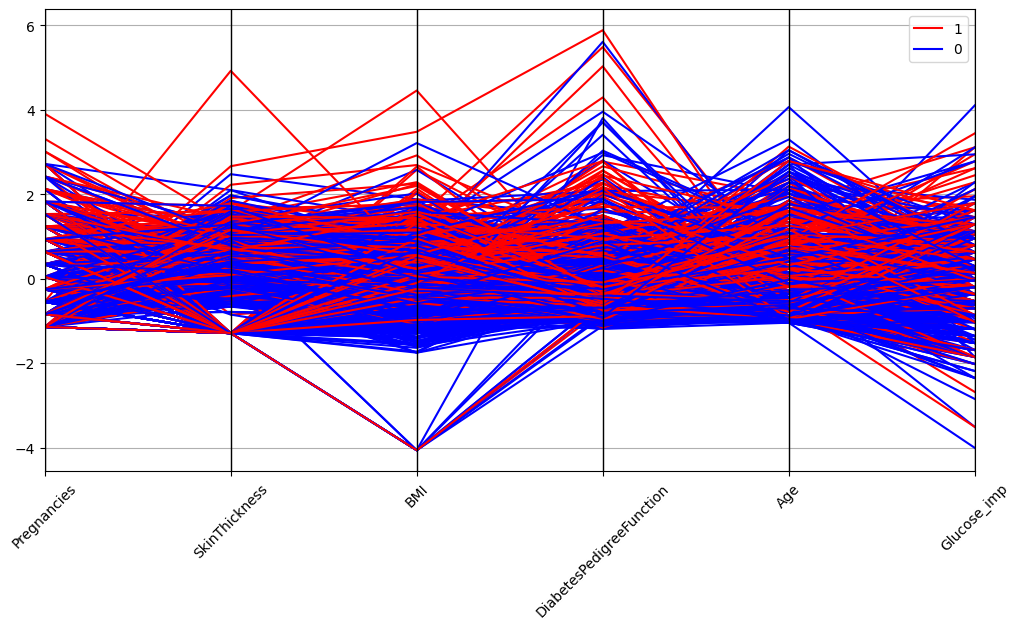

In [20]:
# Visualizamos la relación entre las características de nuestro dataset escalado
data_sc = pd.DataFrame(data=StandardScaler().fit_transform(df_cleaned.drop(['Outcome'], axis=1)), columns=df_cleaned.columns[:-1])
data_sc['Outcome'] = df_cleaned.Outcome
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data_sc, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

## **Observaciones**
El proceso de escalado no veo que genera mejor patrón comparativo entre ambas condiciones. Hay muchísimas lineas entre cada condición. Haré el entrenamiento sin escalar a priori. 

## Entrenamiento del Modelo

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop(['Outcome'],axis=1), df_cleaned['Outcome'], test_size=0.2, random_state=42)

In [22]:
#Árbol de decisión sin parámetros especiales.
total_tree = DecisionTreeClassifier(random_state = 42)
total_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


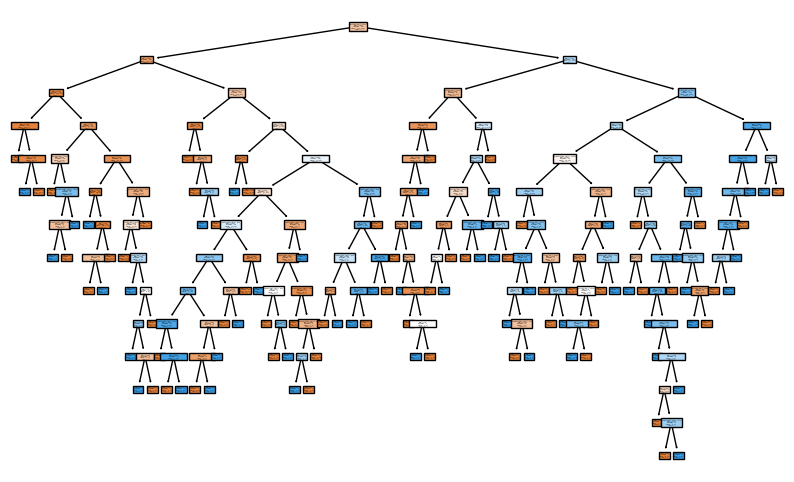

In [23]:
# Visualiza el árbol de decisión gráficamente
plt.figure(figsize=(10, 6))
plot_tree(total_tree, feature_names=X_train.columns, class_names=['0','1'], filled=True)
plt.show()

In [24]:
#Árbol de decisiones con parámetros establecidos (mínimos estándar)
delim_tree = DecisionTreeClassifier(max_depth=3, max_features=X_train.shape[1]//2, min_samples_leaf=20, min_samples_split=30, random_state=42)
delim_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,30
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,3
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


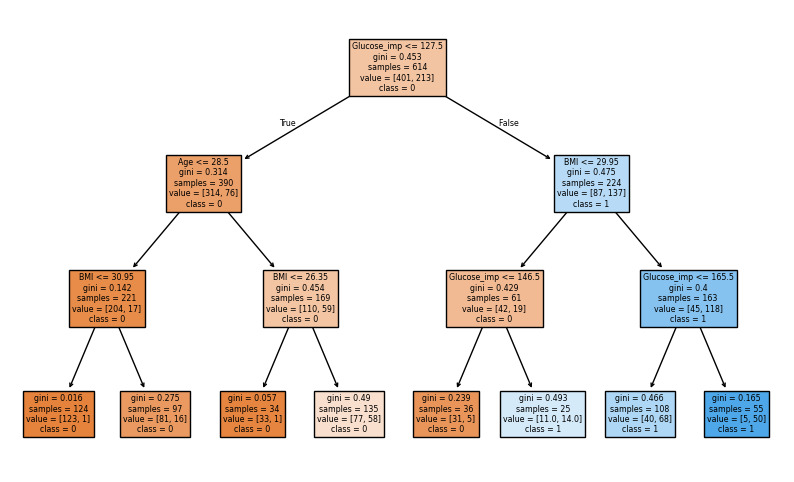

In [25]:
# Visualiza el árbol de decisión gráficamente
plt.figure(figsize=(10, 6))
plot_tree(delim_tree, feature_names=X_train.columns, class_names=['0','1'], filled=True)
plt.show()

### **Observaciones**

Las variables clasificadoras aparente en este árbol son principalmente: los niveles de glucosa (para casos sin diabetes) y el índice de masa corporal seguido la edad para los casos con diabetes. Podría ser una buena aproximación conociendo la enfermedad, pero no considero que el modelo obtenga nodos tan puros. Existen muchas mezclas de casos en la clasificación. 

#### Ajuste de parámetros manual para mejor visualización. 
Empezare por 'min_samples_leaf' con un 5% de mis muestras aprox 35. Con un mínimo de muestras para cortes de 30. 

In [26]:
approach_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=35, min_samples_split=30, random_state=42)
approach_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,30
,min_samples_leaf,35
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


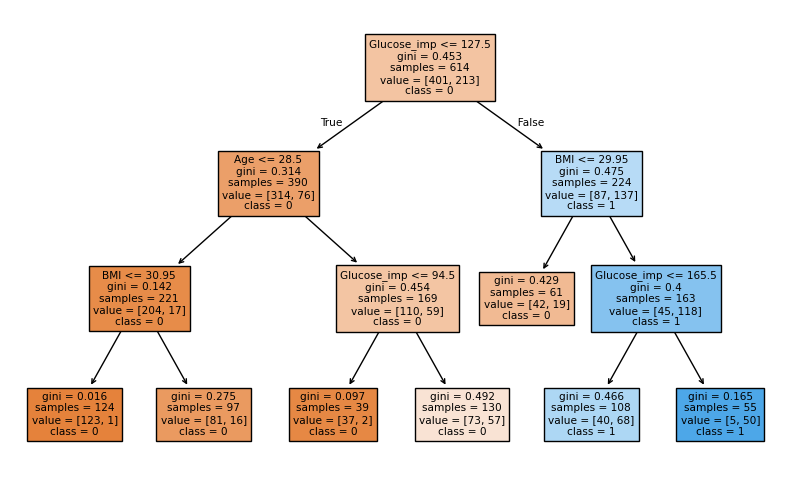

In [27]:
# Visualiza el árbol de decisión gráficamente
plt.figure(figsize=(10, 6))
plot_tree(approach_tree, feature_names=X_train.columns, class_names=['0','1'], filled=True)
plt.show()

## **Observaciones**

En este otro caso, las variables clasificadoras van más por niveles de glucosa como primera instancia separadora, el grupo etario (con un nivel de glucosa inferior a 127,5) para aquellos que pueden no tener la condición y el índice de masa corporal junto con los niveles de glucosa de nuevo. 

Realmente desconozco si un árbol de decisión puede tomar esa misma variable para volver a clasificar sobre un grupo ya clasificado por las mismas razones. Entendería que establece diferentes umbrales para poder diseccionar, pero desconozco si el hecho de estarse reciclando pueda tener un 'buen sentido discriminatorio'

### Evaluación comparativa de los últimos dos árboles de decisión a partir de sus métricas

In [28]:
# Evaluar el modelo mínimo de parámetros en entrenamiento y prueba
train_pred_delim = delim_tree.predict(X_train)
test_pred_delim = delim_tree.predict(X_test)

# Evaluar el modelo de parámetros ajustados manualmente en entrenamiento y prueba
train_pred_approach = approach_tree.predict(X_train)
test_pred_approach = approach_tree.predict(X_test)

In [29]:
# Métricas del modelo mínimo de parámetros vs ajustados manualmente.
def get_metrics(y_train, y_test, train_preds, test_preds):
    print("Métricas en Train:")
    print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
    print(f"Precision: {precision_score(y_train, train_preds)}")
    print(f"Recall: {recall_score(y_train, train_preds)}")
    print(f"F1 Score: {f1_score(y_train, train_preds,)}")
    
    print("\nMétricas en Test:")
    print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
    print(f"Precision: {precision_score(y_test, test_preds)}")
    print(f"Recall: {recall_score(y_test, test_preds)}")
    print(f"F1 Score: {f1_score(y_test, test_preds)}")

# Usar así:
get_metrics(y_train, y_test, train_pred_delim, test_pred_delim)
get_metrics(y_train, y_test, train_pred_approach, test_pred_approach)

Métricas en Train:
Accuracy: 0.7768729641693811
Precision: 0.7021276595744681
Recall: 0.6197183098591549
F1 Score: 0.6583541147132169

Métricas en Test:
Accuracy: 0.7597402597402597
Precision: 0.68
Recall: 0.6181818181818182
F1 Score: 0.6476190476190476
Métricas en Train:
Accuracy: 0.7719869706840391
Precision: 0.7239263803680982
Recall: 0.5539906103286385
F1 Score: 0.6276595744680851

Métricas en Test:
Accuracy: 0.7727272727272727
Precision: 0.7272727272727273
Recall: 0.5818181818181818
F1 Score: 0.6464646464646465


## **Observaciones**

En términos generales, el ajuste manual de los parámetros (approach) ha aumentado el nivel de aciertos en las predicciones positivas y negativas, tanto en el de entrenamiento como en el de prueba. Aun asi, considero que para ajustar más el modelo. Podríamos optimizar el modelo a través de la búsqueda de hiperparámetros.

### Optimización con Hiperparámetros

Haré optimización sobre score = 'Accuracy' porque considero que a modo general, queremos mejorar el número de aciertos generales sobre la condición 'verdadera' (diabetes) y así puedo hacer una comparativa con los próximos modelos de 'Random forest' y 'Boosting'

In [30]:
dt = DecisionTreeClassifier(random_state=42)

# Define los valores que quieres probar para max_features
param_grid = {
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.8],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Define el GridSearch con validación cruzada (cv=5 folds)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Entrenamos y buscamos la mejor combinación de hiperparámetros
grid_search.fit(X_train, y_train)

# Resultados
print("hiperparámetros:", grid_search.best_params_)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
hiperparámetros: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}


### Prueba del Modelo de Árbol de decisión con los mejores parámetros encontrados

In [31]:
def_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth= None, max_features= 'sqrt', min_samples_leaf=2, min_samples_split=10, random_state=42)
def_tree.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


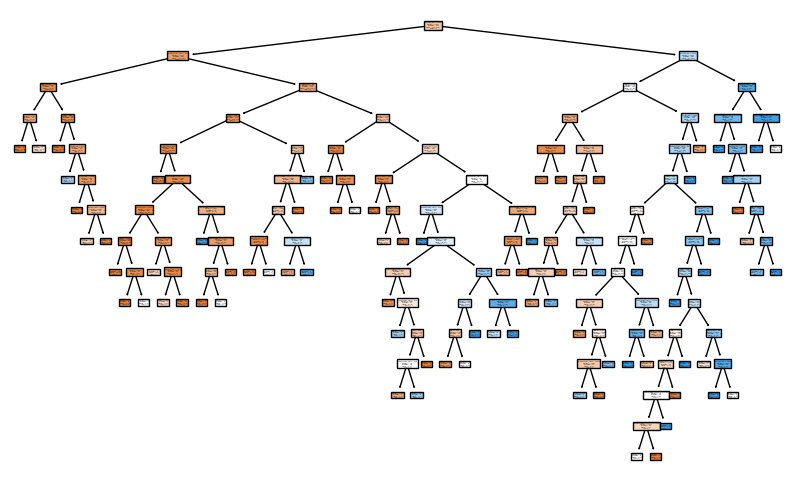

In [32]:
# Visualizamos el árbol de decisión definitivo gráficamente
plt.figure(figsize=(10, 6))
plot_tree(def_tree, feature_names=X_train.columns, class_names=['0','1'], filled=True)
plt.show()

In [33]:
# Evaluar el modelo defintivo con hiperparámetros en entrenamiento y prueba
train_pred_def = def_tree.predict(X_train)
test_pred_def = def_tree.predict(X_test)

In [34]:
def print_metrics_single_model(y_train, y_test, train_preds, test_preds):
    print("Métricas en Train:")
    print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
    print(f"Precision: {precision_score(y_train, train_preds)}")
    print(f"Recall: {recall_score(y_train, train_preds)}")
    print(f"F1 Score: {f1_score(y_train, train_preds)}")
    print("\nMétricas en Test:")
    print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
    print(f"Precision: {precision_score(y_test, test_preds)}")
    print(f"Recall: {recall_score(y_test, test_preds)}")
    print(f"F1 Score: {f1_score(y_test, test_preds)}")

print_metrics_single_model(y_train, y_test, train_pred_def, test_pred_def)

Métricas en Train:
Accuracy: 0.8925081433224755
Precision: 0.9106145251396648
Recall: 0.7652582159624414
F1 Score: 0.8316326530612245

Métricas en Test:
Accuracy: 0.7142857142857143
Precision: 0.6078431372549019
Recall: 0.5636363636363636
F1 Score: 0.5849056603773585


## **Observaciones**

Aparentemente con los hiperparámetros los datos de entrenamiento obtienen un mejor rendimiento general que en el de los parámetros asignados manualmente, pero, en el caso del test, no parecen mejorar demasiado. No estoy muy clara cuál sería la mejor opción para quedarme con el mejor resultado de clasificación. Aún así diseccionaré lo siguiente: 

- Con los hiperparámetros consigo mejor resultado predictivo (mayores aciertos) que con parámetros estándar establecidos manualmente.
- Las métricas en Test no parecen haber mejorado demasiado respecto a los parámetros manuales.
- De acuerdo al último gráfico, la disección es muy amplia y no veo claramente el proceso de selección con nodos muy limpios. 
- El hecho de colocar como mínimo de muestras por hojas = 2, despliega muchas más posibilidades y no sé si mas entropía en el modelo, también es cierto que en el que teníamos parámetros manuales, no obteniamos hojas y nodos tan limpios, pero, de acuerdo a mi criterio, la disección era un poco más clara. 
- Entre todas las variables predictivas, consideraría que las más importantes para la clasificación serían: índice de masa corporal, niveles de glucosa y como última vista, la edad. Me sorprende mucho que no haya salido la predisposición genética en este punto. 